# Evolución diaria infectados de Coronavirus

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares

In [2]:
# Datos
# x: dias de Marzo
# y: infectados declarados
x=np.array([4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23, \
           24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,  \
           41,42])
y=np.array([1,6,8,12,19,23,34,55,57,62,68,78,83,98,110,119,158,225,266,301, \
           387,502,589,690,745,820,966,1054,1133,1265,1353,1451,1553,1628,1715,1795,1894, \
           1975,2142])

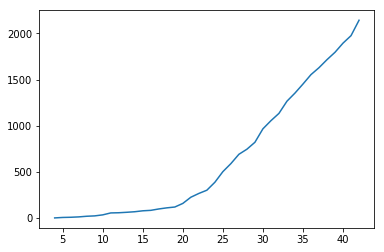

In [3]:
plt.plot(x,y);

In [4]:
# define model   f = A2 / Exp(-A0^(t-4 - A1) )  --  (f: aproximación ; t:día de marzo)
def model(a,x):
    ap = a[2] / (1+np.exp( -(x - 4 - a[1] ) * a[0] )  )
    return ap

In [5]:
# define objective
def objective(a,x,y):
    return model(a,x)-y

In [6]:
# Jacobian
def jac(a,x,y):
    J = np.empty((len(x),len(a)))
    
    arg =  (x - 4 - a[1] ) * a[0]
    expo = np.exp( -arg ) 
    sigmoide = model(a,x)
    
    # df/dA0
    J[:, 0] = sigmoide**2 * expo * arg / (a[2] * a[0])
    # df/dA1
    J[:, 1] = sigmoide**2 * (-expo) * a[0] / a[2]
    # df/dA2
    J[:, 2] = sigmoide / a[2]
    return J


In [7]:
# initial values
a0 = np.array([1.1,25,2500])

In [8]:
res = least_squares(objective, a0, jac=jac, bounds=(0, 5000), args=(x, y), verbose=1)

`ftol` termination condition is satisfied.
Function evaluations 10, initial cost 6.2881e+06, final cost 1.9979e+04, first-order optimality 1.01e+04.


In [9]:
a = res.x
a


array([1.90057903e-01, 2.83237064e+01, 2.35522276e+03])

In [10]:
def pred(a,xx):
    ap = a[2] / (1+np.exp( -(xx - 4 - a[1] ) * a[0] )  )
    return ap

In [11]:
yy = model(a,x)

In [13]:
pred(a,43)

2081.5932912660573

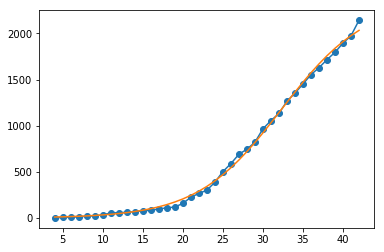

In [14]:
plt.plot(x,y,'o-')
plt.plot(x,yy)
plt.show()

In [15]:
yy

array([  10.76891238,   13.01060478,   15.71580723,   18.97892545,
         22.91293861,   27.6527547 ,   33.35903465,   40.22248456,
         48.46857621,   58.36259578,   70.2148309 ,   84.38557964,
        101.28949224,  121.39853224,  145.24256798,  173.40629209,
        206.52085056,  245.24831357,  290.25705003,  342.18633673,
        401.59933449,  468.92507867,  544.3924399 ,  627.96196759,
        719.26463626,  817.55887632,  921.71773339, 1030.25553626,
       1141.39773675, 1253.18946513, 1363.62989231, 1470.81336166,
       1573.05658779, 1668.99462224, 1757.63553002, 1838.37234977,
       1910.95836256, 1975.45629434, 2032.17342251])

In [16]:
xmin=4
xmax=100
dx = xmax-xmin+1
xxx = np.linspace(xmin,xmax,dx)
yyy = model(a,xxx)


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:3449: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '


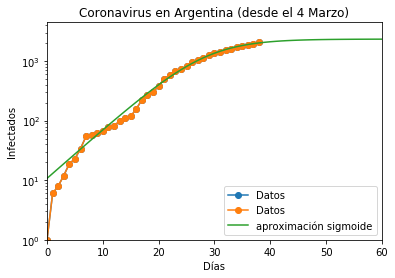

In [17]:
plt.semilogy(x-4,y,'o-', label='Datos')
plt.plot(x-4,y,'o-', label='Datos')
plt.plot(xxx-4,yyy, label='aproximación sigmoide')
plt.ylabel('Infectados')
plt.xlabel('Días')
plt.ylim(0,1200000)
plt.xlim(0,60)
plt.ylim(0,4500)
plt.xlim(0,60)
plt.title('Coronavirus en Argentina (desde el 4 Marzo)')
plt.legend()
plt.savefig('coronasigmoide.png', dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None);

plt.show();

In [18]:
a

array([1.90057903e-01, 2.83237064e+01, 2.35522276e+03])